# Time-Series Analysis

## Contents
### 1. Import Libraries and Data
### 2. Explore Data for Time-Series
### 3. Plotting the Data
### 4. Creating subset for US
### 5. Redefine data_sub
### 6. Decomposition
### 7. Testing for Stationarity
### 8. Stationarizing the Data

## 1. Import Libraries and Data

In [4]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [6]:
df = pd.read_pickle(os.path.join(r'/Users/sydneyjohnson/Documents/CF Data Analytics Course/09-2024 A6 Spotify Analysis/02 Data/Prepared Data/fulldf9_27.pkl'))

## 2. Explore Data for Time-Series

In [11]:
# display all columns
pd.set_option('display.max_columns', None)

In [13]:
df.head()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,album_name,album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,song_count
0,2plbrEY59IikOBgBGLjaoe,Die With A Smile,"Lady Gaga, Bruno Mars",1,0,0,NaN,2024-09-20,99,False,251667,Die With A Smile,2024-08-16,0.521,0.592,6,-7.777,0,0.0304,0.30800,0.000000,0.122,0.535,157.969,3,1860
1,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,2,0,0,NaN,2024-09-20,100,False,210373,HIT ME HARD AND SOFT,2024-05-17,0.747,0.507,2,-10.171,1,0.0358,0.20000,0.060800,0.117,0.438,104.978,4,6116
2,5G2f63n7IPVPPjfNIGih7Q,Taste,Sabrina Carpenter,3,0,0,NaN,2024-09-20,96,False,157279,Short n' Sweet,2024-08-23,0.674,0.907,3,-4.086,1,0.0640,0.10100,0.000000,0.297,0.721,112.964,4,1140
3,7tI8dRuH2Yc6RuoTjxo4dU,Who,Jimin,4,0,1,NaN,2024-09-20,94,False,170887,MUSE,2024-07-19,0.660,0.756,0,-3.743,0,0.0320,0.00289,0.000000,0.193,0.838,116.034,4,2389
4,2qSkIjg1o9h3YT9RAgYN75,Espresso,Sabrina Carpenter,5,0,45,NaN,2024-09-20,97,True,175459,Espresso,2024-04-12,0.701,0.760,0,-5.478,1,0.0285,0.10700,0.000065,0.185,0.690,103.969,4,7504


#### I think I'm going to see how average danceability changes by snapshot date. What I hope to see is that dance music might be more popular in warmer months, when people are more energized and going dancing. Because this is global data, and many of these places do not experience seasonality in the same way, this might be a bust. I may try globally or narrow down to the US. 

In [19]:
# Creating a subset for time series analysis
sub = df.groupby('snapshot_date')['danceability'].mean()

In [21]:
sub.head()

snapshot_date
2023-10-18    0.689710
2023-10-19    0.689710
2023-10-20    0.690424
2023-10-21    0.690287
2023-10-22    0.694220
Name: danceability, dtype: float64

In [29]:
data_sub = sub.to_frame()

In [33]:
data_sub.head()

,danceability
snapshot_date,
2023-10-18,0.689710
2023-10-19,0.689710
2023-10-20,0.690424
2023-10-21,0.690287
2023-10-22,0.694220


## 3. Plotting the Data

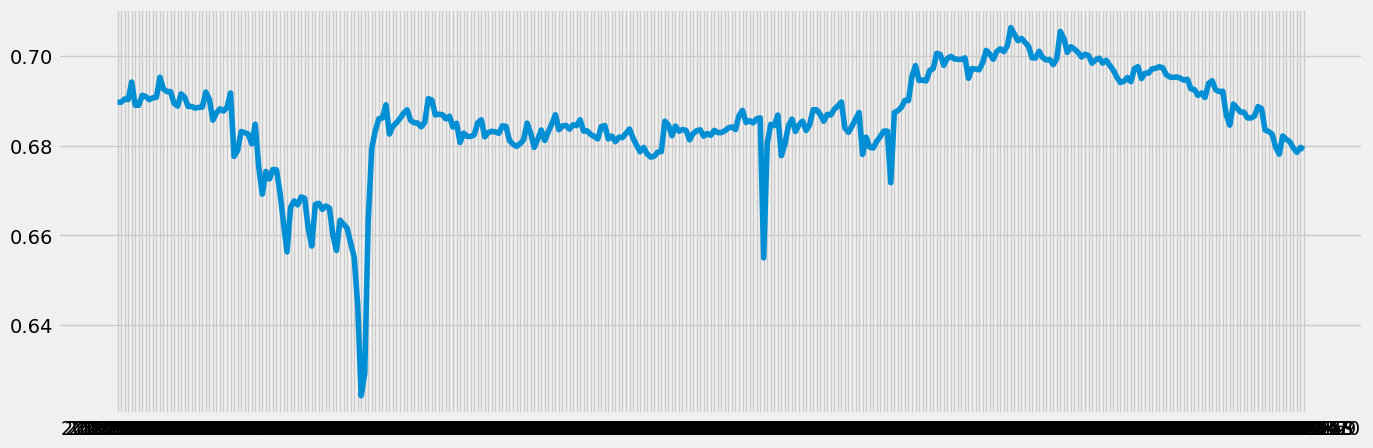

In [36]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

## 4. Creating subset for US

In [47]:
us_data_sub =  df[df['country']=='US']
us_data_sub.head()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,album_name,album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,song_count
250,5G2f63n7IPVPPjfNIGih7Q,Taste,Sabrina Carpenter,1,0,0,US,2024-09-20,96,False,157279,Short n' Sweet,2024-08-23,0.674,0.907,3,-4.086,1,0.0640,0.10100,0.0000,0.2970,0.721,112.964,4,1140
251,2plbrEY59IikOBgBGLjaoe,Die With A Smile,"Lady Gaga, Bruno Mars",2,0,0,US,2024-09-20,99,False,251667,Die With A Smile,2024-08-16,0.521,0.592,6,-7.777,0,0.0304,0.30800,0.0000,0.1220,0.535,157.969,3,1860
252,0WbMK4wrZ1wFSty9F7FCgu,"Good Luck, Babe!",Chappell Roan,3,0,0,US,2024-09-20,97,False,218423,"Good Luck, Babe!",2024-04-05,0.700,0.582,11,-5.960,0,0.0356,0.05020,0.0000,0.0881,0.785,116.712,4,2718
253,7tI8dRuH2Yc6RuoTjxo4dU,Who,Jimin,4,1,4,US,2024-09-20,94,False,170887,MUSE,2024-07-19,0.660,0.756,0,-3.743,0,0.0320,0.00289,0.0000,0.1930,0.838,116.034,4,2389
254,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,5,-1,-1,US,2024-09-20,100,False,210373,HIT ME HARD AND SOFT,2024-05-17,0.747,0.507,2,-10.171,1,0.0358,0.20000,0.0608,0.1170,0.438,104.978,4,6116


In [49]:
# Creating a subset for time series analysis
us_data_sub = us_data_sub.groupby('snapshot_date')['danceability'].mean()

In [51]:
us_data_sub.head()

snapshot_date
2023-10-18    0.65394
2023-10-19    0.65394
2023-10-20    0.65662
2023-10-21    0.63950
2023-10-22    0.64052
Name: danceability, dtype: float64

In [61]:
us_data_sub.head()

,danceability
snapshot_date,
2023-10-18,0.65394
2023-10-19,0.65394
2023-10-20,0.65662
2023-10-21,0.63950
2023-10-22,0.64052


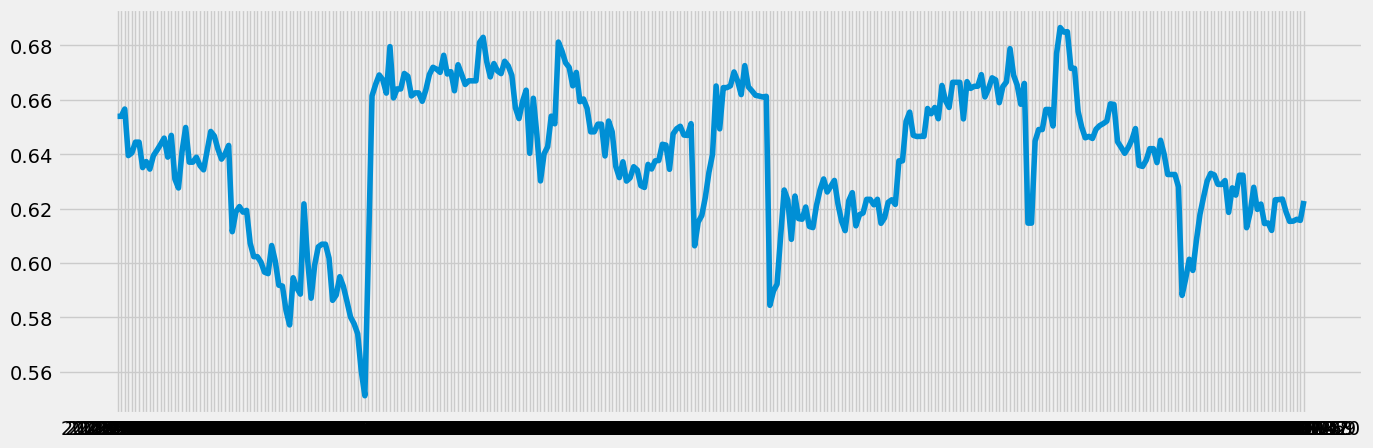

In [63]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(us_data_sub)

#### I'm going to continute forward with the global data instead of the US data.

In [66]:
# Check for missing values (you shouldn't have any)

data_sub.isnull().sum() 

danceability    0
dtype: int64

In [70]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

6

In [74]:
dups.head(50)

snapshot_date
2023-10-18    False
2023-10-19     True
2023-10-20    False
2023-10-21    False
2023-10-22    False
2023-10-23    False
2023-10-24     True
2023-10-25    False
2023-10-26    False
2023-10-27    False
2023-10-28    False
2023-10-29    False
2023-10-30    False
2023-10-31    False
2023-11-01    False
2023-11-02    False
2023-11-03    False
2023-11-04    False
2023-11-05    False
2023-11-06    False
2023-11-07    False
2023-11-08     True
2023-11-09    False
2023-11-10    False
2023-11-11    False
2023-11-12    False
2023-11-13    False
2023-11-14    False
2023-11-15    False
2023-11-16    False
2023-11-17    False
2023-11-18    False
2023-11-19    False
2023-11-20    False
2023-11-21    False
2023-11-22    False
2023-11-23    False
2023-11-24    False
2023-11-25    False
2023-11-26    False
2023-11-27    False
2023-11-28    False
2023-11-29    False
2023-11-30    False
2023-12-01    False
2023-12-02    False
2023-12-03    False
2023-12-04    False
2023-12-05    False
2023-1

In [76]:
data_sub = data_sub.drop_duplicates()

In [78]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

0

## 5. Redefine data_sub (because it disappeared?)

In [98]:
# Creating a subset for time series analysis
sub = df.groupby('snapshot_date')['danceability'].mean()

In [100]:
sub.head()

snapshot_date
2023-10-18    0.689710
2023-10-19    0.689710
2023-10-20    0.690424
2023-10-21    0.690287
2023-10-22    0.694220
Name: danceability, dtype: float64

In [102]:
data_sub = sub.to_frame()

In [104]:
data_sub.head()

,danceability
snapshot_date,
2023-10-18,0.689710
2023-10-19,0.689710
2023-10-20,0.690424
2023-10-21,0.690287
2023-10-22,0.694220


## 6. Decomposition

In [108]:
# Decompose the time series using an multiplicative model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='multiplicative', period=7)

In [110]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

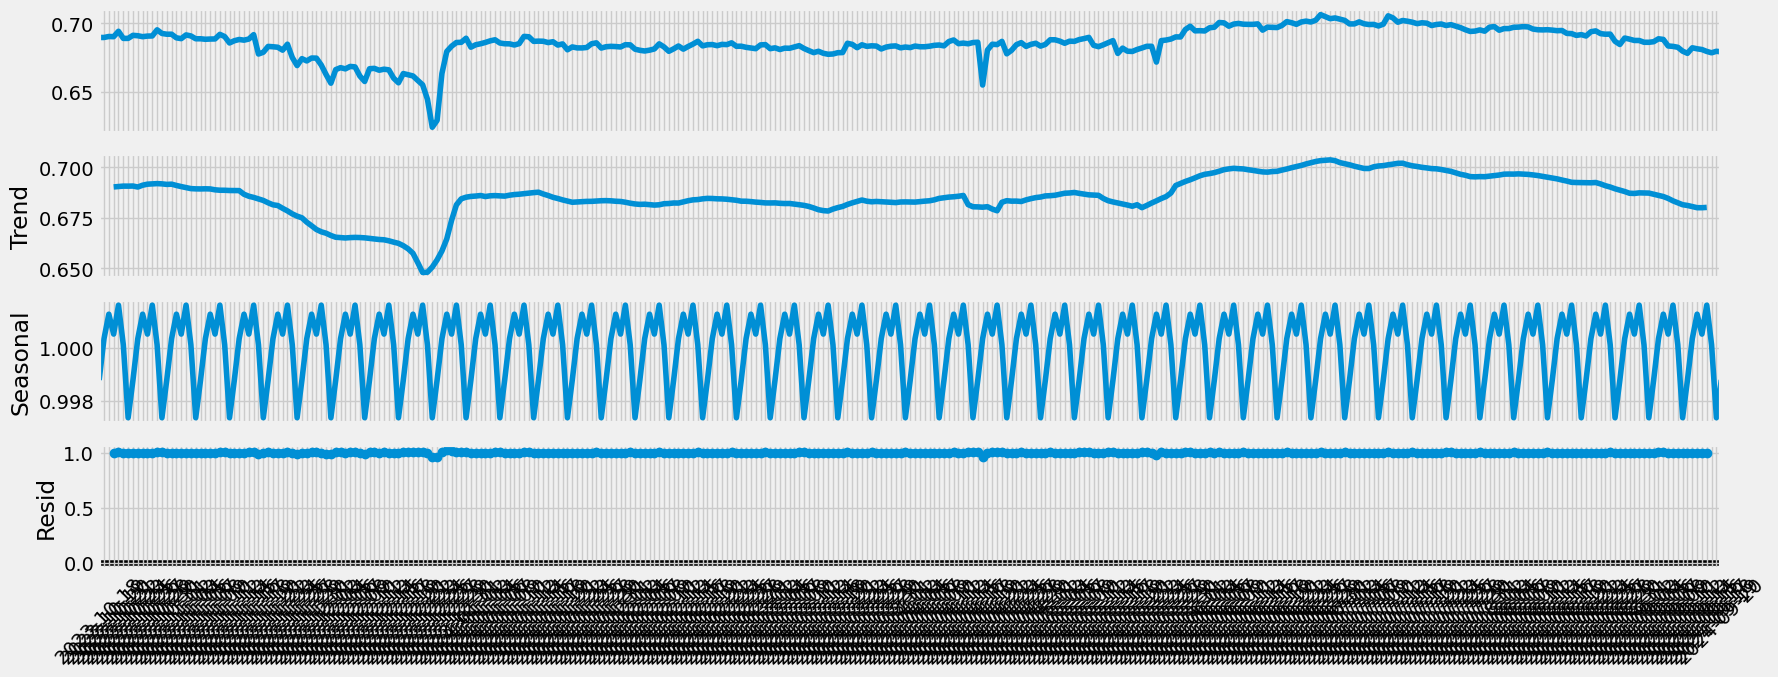

In [118]:
# Plot the separate components

decomposition.plot()
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.tight_layout()  # Adjust layout to accommodate rotated labels
plt.show()

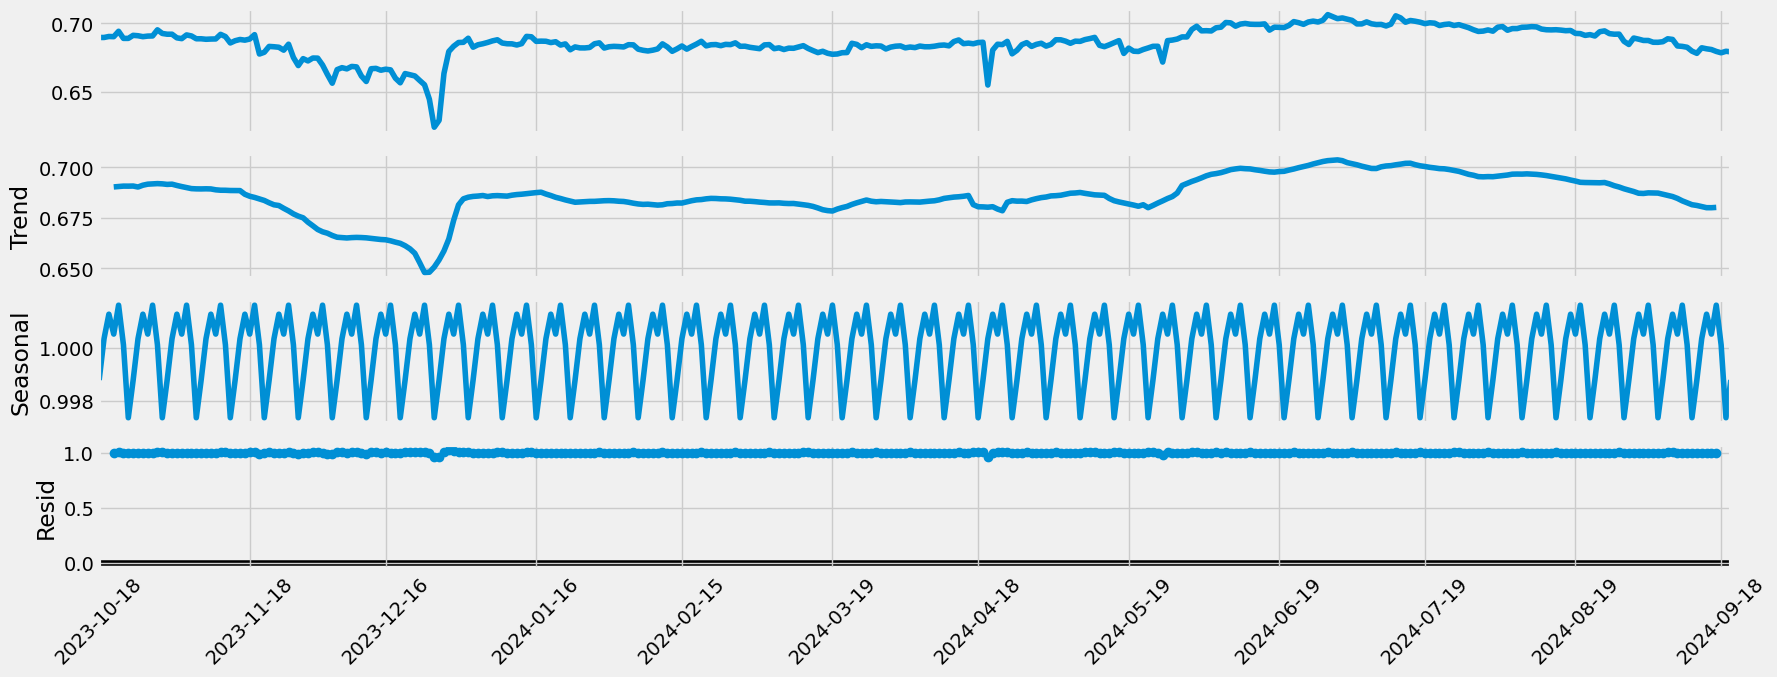

In [122]:
# From ChatGPT
import matplotlib.dates as mdates

# Plot the separate components
decomposition.plot()

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Set the date format and frequency for x-axis ticks
ax = plt.gca()  # Get current axis
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Display every 3rd month (adjust interval as needed)

plt.tight_layout()  # Adjust layout to accommodate rotated labels
plt.show()

#### I can't tell if the dip in December is a mistake in the data or not. It's possible that people play so much Christmas music that it changes the mean danceabiltiy.
#### The trend here is like a smoothed version of the level. There is not a lot of linearity. There is a decrease between october and december, a pretty stationary period between January and May, a peak in June/July and a steady decline from there. This actually fits quite well with my hypothesis about the warmer months correlating to dancier music being more popular.
#### The seasonality here is functioning weekly
#### There is very little noise here

## 7. Testing for Stationarity

In [130]:
data_sub.isnull().sum()

danceability    0
dtype: int64

In [134]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['danceability'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.179572
p-value                          0.213743
Number of Lags Used              7.000000
Number of Observations Used    329.000000
Critical Value (1%)             -3.450384
Critical Value (5%)             -2.870365
Critical Value (10%)            -2.571472
dtype: float64


#### The test statistic (-2.178572) is larger than the critial value of -2.870365.
#### The p-value is larger than 0.05
#### We cannot yet reject the null hypothesis that this data is not stationary.

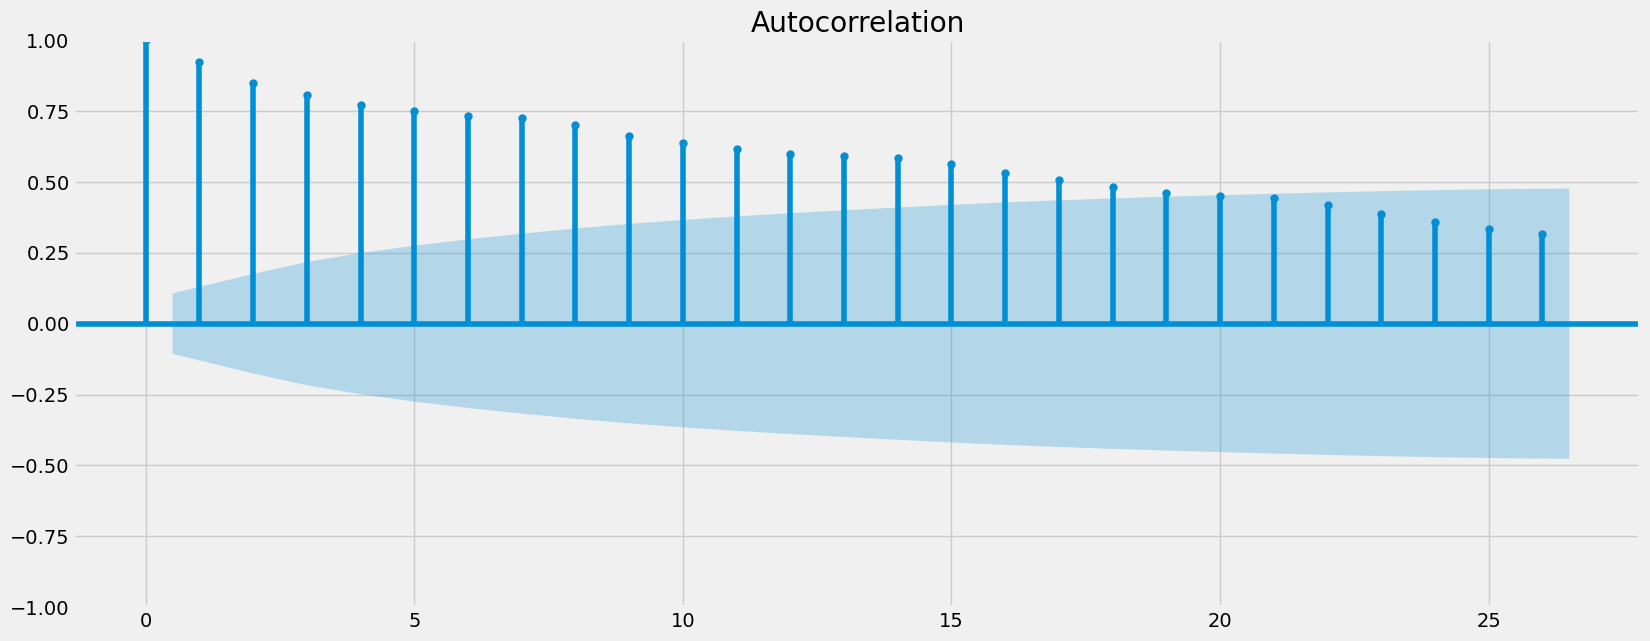

In [150]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

#### There are many lines above the confidence interval. We need to stationarize the data.

## 8. Stationarizing the Data

In [138]:
data_diff = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [140]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [142]:
data_diff.head()

,danceability
snapshot_date,
2023-10-19,0.000000
2023-10-20,0.000714
2023-10-21,-0.000137
2023-10-22,0.003933
2023-10-23,-0.005183


In [144]:
data_diff.columns

Index(['danceability'], dtype='object')

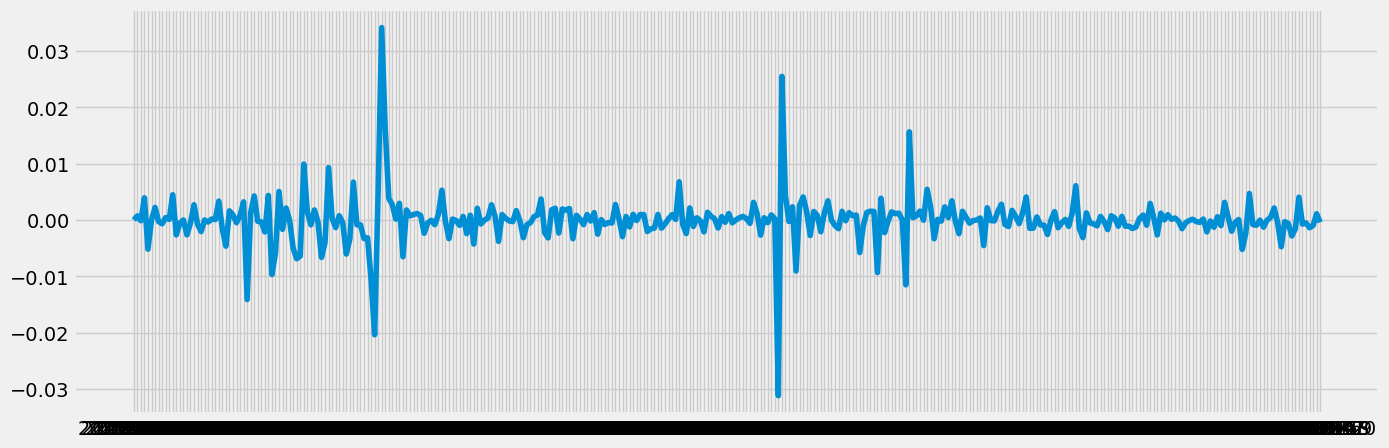

In [146]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [148]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.040560e+01
p-value                        1.860406e-18
Number of Lags Used            5.000000e+00
Number of Observations Used    3.300000e+02
Critical Value (1%)           -3.450322e+00
Critical Value (5%)           -2.870338e+00
Critical Value (10%)          -2.571458e+00
dtype: float64


In [ ]:
#### The test statistic (-10.4056) is much smaller than even the critical value at 1% (-3.870338)
#### The p-value is incredibly small.
#### We can reject the null hypothesis. This data is stationary.

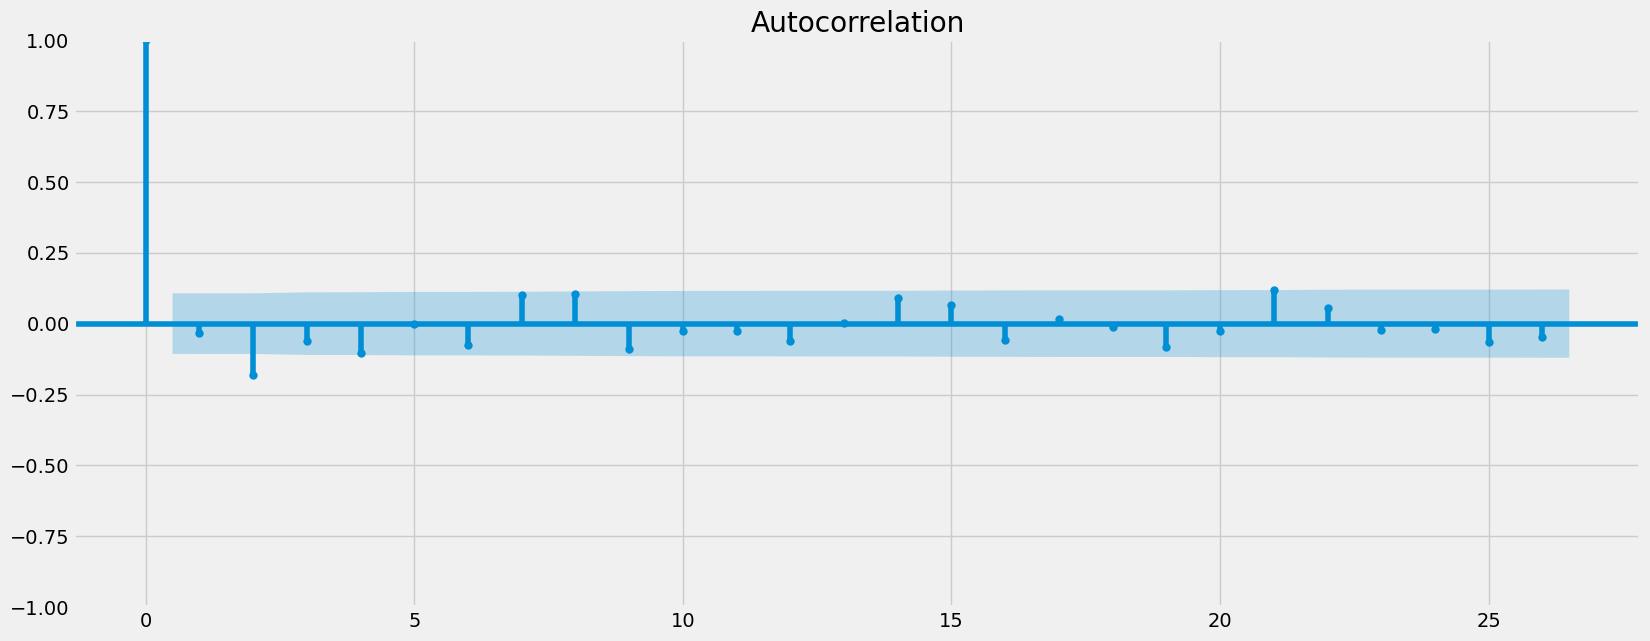

In [153]:
plot_acf(data_diff)
plt.show()

#### The lines are almost all within the confidence interval. 

In [156]:
### Save time series data
data_diff.to_csv(os.path.join(r'/Users/sydneyjohnson/Documents/CF Data Analytics Course/09-2024 A6 Spotify Analysis/02 Data/Prepared Data/danceability_stationary.csv'))